# PCA Examples

+ Using synthetic data and the MNIST dataset.

### Packages

In [1]:
%matplotlib inline
# data and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# modeling packages
import scipy.stats as stats
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.datasets import fetch_openml

### Display Settings

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

### Warm-up

We generate two linearly dependent features with some noise and run PCA.

PCs
[[ 0.8453569   0.53420193]
 [-0.53420193  0.8453569 ]]
Explained Variance Ratio
[0.98046129 0.01953871]


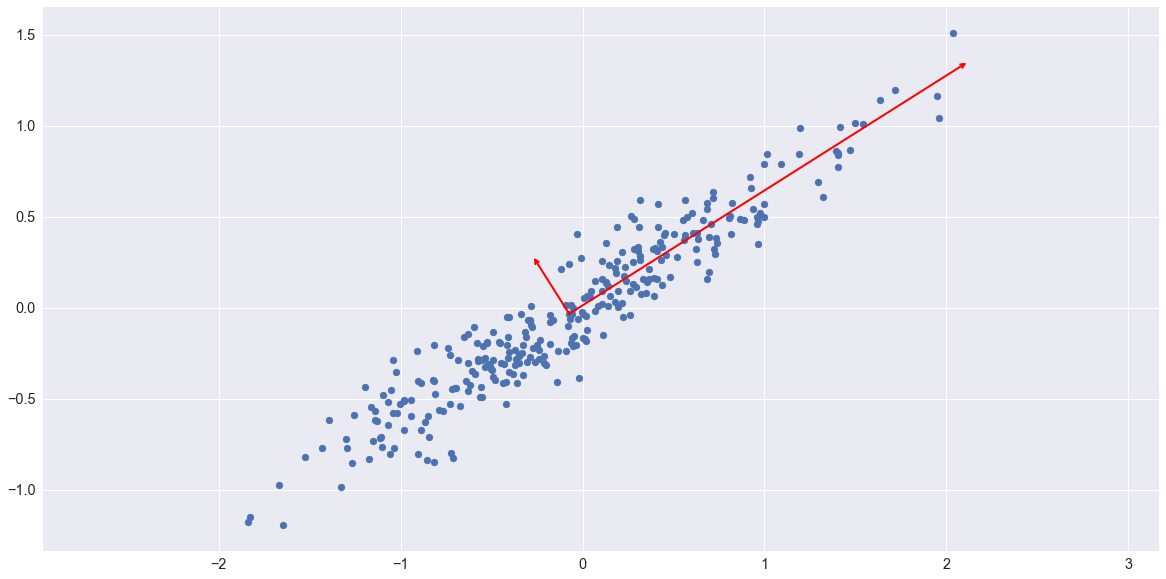

In [3]:
rnd_state = 23
rng = np.random.RandomState(rnd_state)
n_samples = 300

X = rng.randn(n_samples, 2) @ rng.rand(2, 2)
pca = PCA(n_components=2)
pca.fit(X)
print("PCs")
print(pca.components_)
print("Explained Variance Ratio")
print(pca.explained_variance_ratio_)

# plot the PCs
plt.scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.gca().annotate('', pca.mean_ + v, pca.mean_, arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='red'))
plt.axis('equal');

### Compressing the 2-D data into 1-D

We perform 1-D PCA, project the data on the PC, and invert the transform to reconstruct the data.  
We plot the original and reconstructed data.

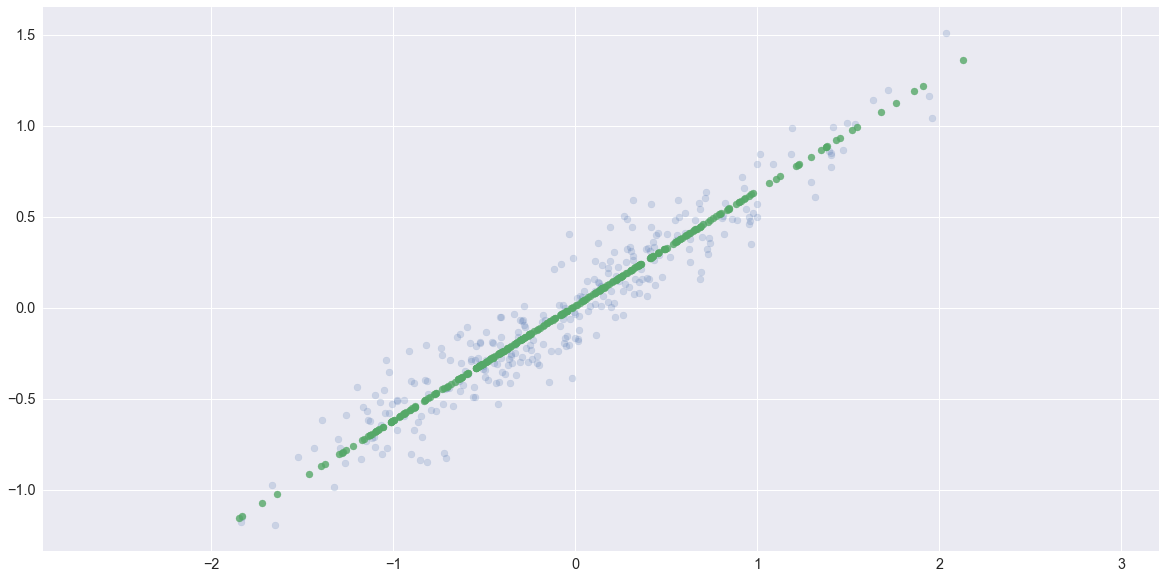

In [4]:
pca1d = PCA(n_components=1)
pca1d.fit(X)
X_1d = pca1d.transform(X)
X_rec = pca1d.inverse_transform(X_1d)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_rec[:, 0], X_rec[:, 1], alpha=0.8)
plt.axis('equal');

## PCA with MNIST

MNIST is a set of 70,000 small images of handwritten digits.  
This is the "Hello World" dataset of Machine Learning.  

Each image is a 28x28 grid of pixels, described by their greyscale, from 0 (white) to 1 (black).

### Load the data
NOTE: the fetch_openml function requires internet connection

In [5]:
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
X_mnist.shape

(70000, 784)

### Run PCA, reduce and reconstruct

In [6]:
n_cmp = 154

pca_mnist = PCA(n_components=n_cmp)
X_minst_red = pca_mnist.fit_transform(X_mnist)
X_mnist_rec = pca_mnist.inverse_transform(X_minst_red)


### Pick a digit and plot the original and reconstructed image

The digit is 9


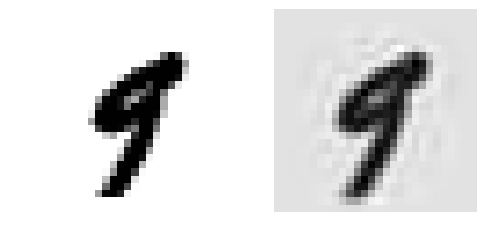

In [7]:
digi = 36000
digit = X_mnist[digi]
digit_img = digit.reshape(28, 28)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(digit_img, cmap = plt.cm.binary, interpolation="nearest")
ax.axis("off")

recdigit = X_mnist_rec[digi]
recdigit_img = recdigit.reshape(28, 28)

axx = fig.add_subplot(1, 2, 2)
axx.imshow(recdigit_img, cmap = plt.cm.binary, interpolation="nearest")
axx.axis("off")

print("The digit is {}".format(y_mnist[digi]))

## IPCA with MNIST

We split the dataset into n_batches using the np.array_split function.  
Then we run incremental PCA for a set number of components.  
Finally we reconstruct the sample

In [8]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist, n_batches):
    inc_pca.partial_fit(X_batch)

X_mnist_ired = inc_pca.transform(X_mnist)
X_mnist_irec = inc_pca.inverse_transform(X_mnist_ired)

### Pick a digit and plot the original and reconstructed image

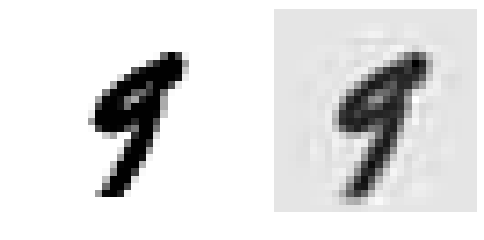

In [9]:
idigi = 36000
idigit = X_mnist[idigi]
idigit_img = idigit.reshape(28, 28)

fig2 = plt.figure(figsize=(8, 4))
ax2 = fig2.add_subplot(1, 2, 1)
ax2.imshow(idigit_img, cmap = plt.cm.binary, interpolation="nearest")
ax2.axis("off")

irecdigit = X_mnist_irec[idigi]
irecdigit_img = irecdigit.reshape(28, 28)

axx2 = fig2.add_subplot(1, 2, 2)
axx2.imshow(irecdigit_img, cmap = plt.cm.binary, interpolation="nearest")
axx2.axis("off");


## RPCA with MNIST

We run randomized PCA for a set number of components.  
Then we reconstruct the sample

In [10]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_mnist_rred = rnd_pca.fit_transform(X_mnist)
X_mnist_rrec = rnd_pca.inverse_transform(X_mnist_rred)

### Pick a digit and plot the original and reconstructed image

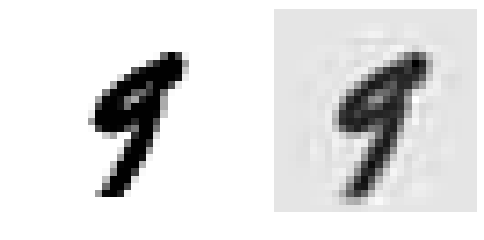

In [11]:
rdigi = 36000
rdigit = X_mnist[rdigi]
rdigit_img = rdigit.reshape(28, 28)

fig3 = plt.figure(figsize=(8, 4))
ax3 = fig3.add_subplot(1, 2, 1)
ax3.imshow(rdigit_img, cmap = plt.cm.binary, interpolation="nearest")
ax3.axis("off")

rrecdigit = X_mnist_rrec[rdigi]
rrecdigit_img = irecdigit.reshape(28, 28)

axx3 = fig3.add_subplot(1, 2, 2)
axx3.imshow(rrecdigit_img, cmap = plt.cm.binary, interpolation="nearest")
axx3.axis("off");